<a href="https://colab.research.google.com/github/AkkiNikumbh/ML-EXPERIMENTS/blob/main/AkashSingh_Experiment_9_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
# 1. Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset Shape: ", X.shape)
print("Target Classes: ", data.target_names)

Dataset Shape:  (569, 30)
Target Classes:  ['malignant' 'benign']


In [3]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 4. Train Linear SVM
lin_svm = SVC(kernel='linear')
lin_svm.fit(X_train, y_train)

print("\n===== Linear SVM Performance =====")
print(classification_report(y_test, lin_svm.predict(X_test)))

# 5. Polynomial Kernel SVM
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

print("\n===== Polynomial Kernel Performance =====")
print(classification_report(y_test, poly_svm.predict(X_test)))

# 6. RBF Kernel SVM
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

print("\n===== RBF Kernel Performance =====")
print(classification_report(y_test, rbf_svm.predict(X_test)))


===== Linear SVM Performance =====
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


===== Polynomial Kernel Performance =====
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        54
           1       0.86      1.00      0.93        89

    accuracy                           0.90       143
   macro avg       0.93      0.87      0.89       143
weighted avg       0.92      0.90      0.90       143


===== RBF Kernel Performance =====
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg 

In [5]:
# 7. Visualization using PCA (2D Projection)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaler.transform(X))

# Train SVM again on PCA-reduced data for visualization
lin_svm_vis = SVC(kernel='linear').fit(X_reduced, y)
rbf_svm_vis = SVC(kernel='rbf').fit(X_reduced, y)
poly_svm_vis = SVC(kernel='poly').fit(X_reduced, y)


def plot_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:,0], X[:,1], c=y, edgecolors='black')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


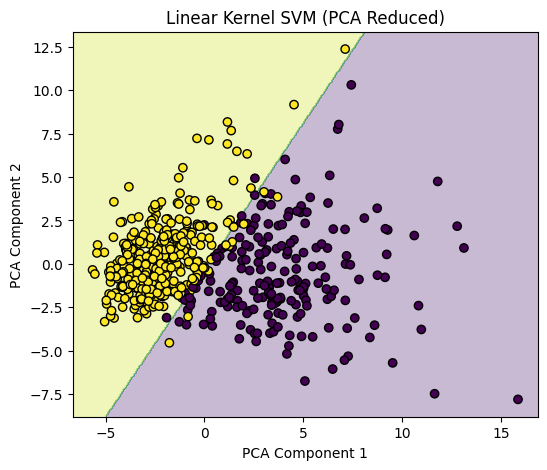

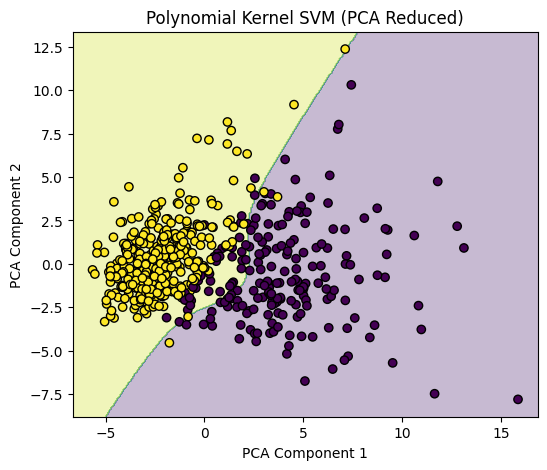

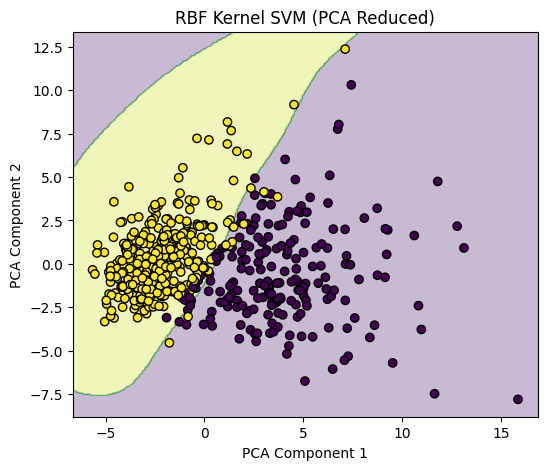

In [6]:
# 8. Plot decision boundaries
plot_boundary(lin_svm_vis, X_reduced, y, "Linear Kernel SVM (PCA Reduced)")
plot_boundary(poly_svm_vis, X_reduced, y, "Polynomial Kernel SVM (PCA Reduced)")
plot_boundary(rbf_svm_vis, X_reduced, y, "RBF Kernel SVM (PCA Reduced)")